In [2]:
import numpy as np

In [14]:
timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps,input_features))
state_t=np.zeros((output_features,))
W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))

successive_outputs=[]
for input_t in inputs:#input_t (32,)
    output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b) #(64,)
    successive_outputs.append(output_t)
    state_t=output_t

final_output_sequences=np.concatenate(successive_outputs,axis=0)
#(timesteps,output_features) 

In [12]:
from keras.layers import SimpleRNN
#simplernn input(batch_size,timesteps,input_features)

(64,)

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()
#return only last ouput

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()
#return full state sequence

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary() #stack to increase reoresentational power

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)

In [7]:
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6428 - acc: 0.6109 - val_loss: 0.4986 - val_acc: 0.7790
Epoch 2/10
20000/20000 [==============================] - 19s 936us/step - loss: 0.4150 - acc: 0.8226 - val_loss: 0.3501 - val_acc: 0.8550
Epoch 3/10
20000/20000 [==============================] - 19s 937us/step - loss: 0.3155 - acc: 0.8741 - val_loss: 0.3357 - val_acc: 0.8676
Epoch 4/10
20000/20000 [==============================] - 19s 942us/step - loss: 0.2471 - acc: 0.9034 - val_loss: 0.3350 - val_acc: 0.8640
Epoch 5/10
20000/20000 [==============================] - 19s 946us/step - loss: 0.2239 - acc: 0.9165 - val_loss: 0.3744 - val_acc: 0.8366
Epoch 6/10
20000/20000 [==============================] - 19s 941us/step - loss: 0.1920 - acc: 0.9307 - val_loss: 0.3554 - val_acc: 0.8766
Epoch 7/10
20000/20000 [==============================] - 19s 937us/step - loss: 0.1556 - acc: 0.9443 - val_loss: 0.360

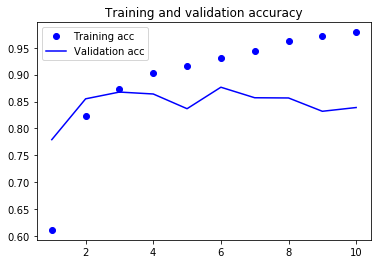

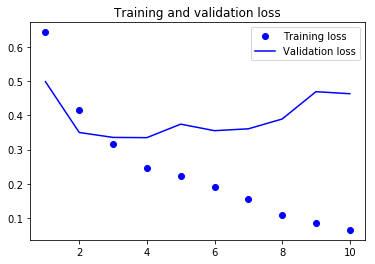

In [8]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.5084 - acc: 0.7643 - val_loss: 0.3586 - val_acc: 0.8672
Epoch 2/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2899 - acc: 0.8873 - val_loss: 0.2943 - val_acc: 0.8770
Epoch 3/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2349 - acc: 0.9114 - val_loss: 0.3062 - val_acc: 0.8860
Epoch 4/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1953 - acc: 0.9275 - val_loss: 0.3070 - val_acc: 0.8644
Epoch 5/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1770 - acc: 0.9338 - val_loss: 0.2907 - val_acc: 0.8872
Epoch 6/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1561 - acc: 0.9439 - val_loss: 0.3577 - val_acc: 0.8752
Epoch 7/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1406 - acc: 0.9505 - val_loss: 0.5298 - val_acc

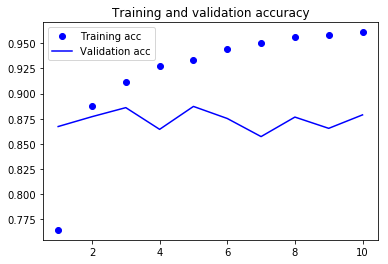

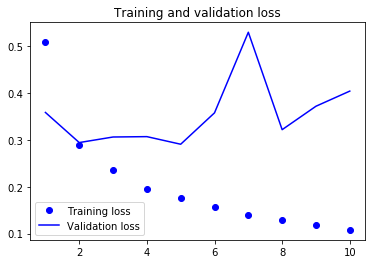

In [12]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()